In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.linalg as la
import time

############################## 4 ##############################

start = time.time()
#initialization
c = 1
h = 0.02
hx = h
hy = h
Nx = int(4/hx)
Ny = int(12/hy)
# ht = 0.001

#============================== initialization ====================================
#negative laplacian
def NeLap(hx,hy,Nx,Ny):    
    #create Dx and Dy
    Dx = 1/hx*sp.diags([1, -1], [0, -1], shape=(Nx, Nx-1)).toarray()
    Dy = 1/hy*sp.diags([1, -1], [0, -1], shape=(Ny, Ny-1)).toarray()

    #calculate Axx Ayy
    Lxx =Dx.transpose().dot(Dx)
    Lyy =Dy.transpose().dot(Dy)

    #create Lxx and Lyy
    Ix = sp.eye(Nx-1)
    Iy = sp.eye(Ny-1)

    #compute the sparse 2D Laplacian
    A = sp.kron(Iy,Lxx)+sp.kron(Lyy,Ix)

    #negative laplacian
    A = -A
    return A
A = NeLap(hx,hy,Nx,Ny)

# find the stability upper bound
vals, vecs = la.eigsh(A, k=1, which = 'LM')
print('The upper bound is ', (4/abs(vals[0])/c**2)**0.5)
print(h**2/4)

ht = 0.99*(4/abs(vals[0])/c**2)**0.5
Nt = int(8/ht)
f = np.zeros((Nt+1,(Nx-1)*(Ny-1)))
u = np.zeros((Nt+1,(Nx-1)*(Ny-1)))

The upper bound is  0.014142377947093152
0.0001


In [2]:
#============================== discretization ====================================
#source function f
def fnf(x, y, t):
    alpha = -50
    nu = 4
    f = np.sin(2*np.pi*nu*t)
    f = f*np.exp(alpha*(x-2)**2+ alpha*(y-2)**2)
    return f

#initial conditions
u[1, :] = u[0, :] + ht*0 + (c*ht)**2/2*(A*u[0, :] + fnf(0,0,0))
f[0, :] = fnf(0, 0, 0)


#time stepping
scnt = 0
tcnt = 1
for k in range(1,Nt):
    for j in range(1,Ny):
        for i in range(1,Nx):
            f[tcnt, scnt] = fnf(i*hx, j*hy, k*ht) 
            scnt+=1         
    u[tcnt+1,:] = 2*u[tcnt,:] - u[tcnt-1,:] + (c*ht)**2*(A.dot(u[tcnt,:]) + f[tcnt, :] )
    tcnt+= 1
    scnt = 0

#reshape the solution
u = u.reshape(-1, Ny-1, Nx-1 )

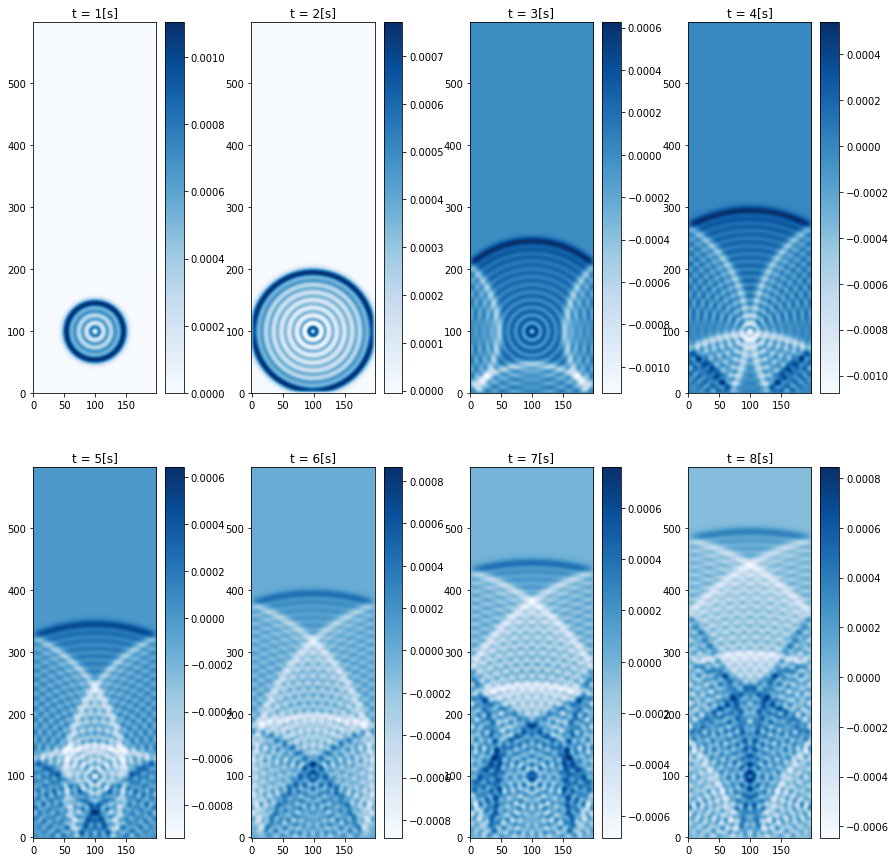

In [3]:
#plot the results with color bar
fig, axs = plt.subplots(2, 4,figsize=(15,15))

im1 = axs[0,0].imshow(u[int(1/ht),:,:],cmap='Blues')
fig.colorbar(im1, ax=axs[0, 0])
axs[0, 0].set_title("t = 1[s]")
axs[0, 0].invert_yaxis()

im2 = axs[0,1].imshow(u[int(2/ht),:,:],cmap='Blues')
fig.colorbar(im2, ax=axs[0, 1])
axs[0, 1].set_title("t = 2[s]")
axs[0, 1].invert_yaxis()

im3 = axs[0,2].imshow(u[int(3/ht),:,:],cmap='Blues')
fig.colorbar(im3, ax=axs[0, 2])
axs[0, 2].set_title("t = 3[s]")
axs[0, 2].invert_yaxis()

im4 = axs[0,3].imshow(u[int(4/ht),:,:],cmap='Blues')
fig.colorbar(im4, ax=axs[0, 3])
axs[0, 3].set_title("t = 4[s]")
axs[0, 3].invert_yaxis()

im1 = axs[1,0].imshow(u[int(5/ht),:,:],cmap='Blues')
fig.colorbar(im1, ax=axs[1, 0])
axs[1, 0].set_title("t = 5[s]")
axs[1, 0].invert_yaxis()

im2 = axs[1,1].imshow(u[int(6/ht),:,:],cmap='Blues')
fig.colorbar(im2, ax=axs[1, 1])
axs[1, 1].set_title("t = 6[s]")
axs[1, 1].invert_yaxis()

im3 = axs[1,2].imshow(u[int(7/ht),:,:],cmap='Blues')
fig.colorbar(im3, ax=axs[1, 2])
axs[1, 2].set_title("t = 7[s]")
axs[1, 2].invert_yaxis()

im4 = axs[1,3].imshow(u[int(8/ht),:,:],cmap='Blues')
fig.colorbar(im4, ax=axs[1, 3])
axs[1, 3].set_title("t = 8[s]")
axs[1, 3].invert_yaxis()

plt.show()


#hover, errors? velocity not exactly 2 dispersion 

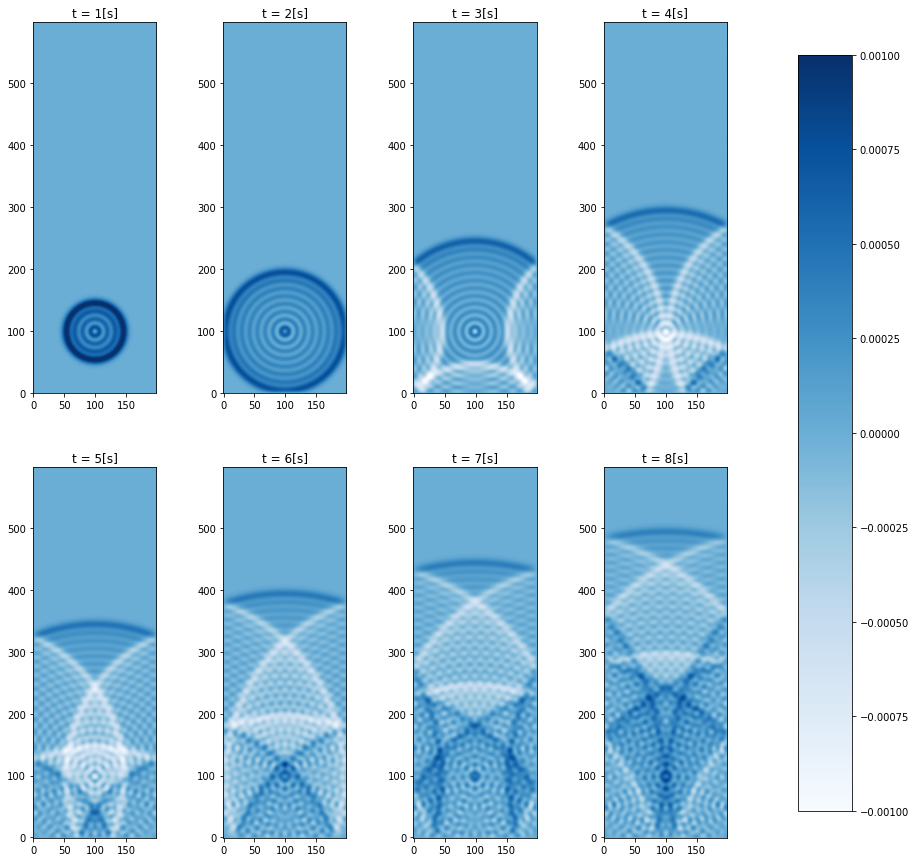

407.7751626968384


In [4]:
fig, axes = plt.subplots(2, 4,figsize=(15,15))
cnt = 1
for ax in axes.flat:
    im = ax.imshow(u[int(cnt/ht),:,:], vmin=-0.001, vmax=0.001,cmap='Blues')
    ax.invert_yaxis()
    ax.set_title('t = ' +str(cnt)+'[s]')
    cnt += 1
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

end = time.time()
elapsed = end - start
print(elapsed)